In [ ]:
# https://www.kaggle.com/code/jesuscarmona12/predicci-n-de-precios-con-regresiones-lineales/notebook
# link de precios de casas regresion lineal

IMPORTAR LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
import datetime

ANALISIS DEL NEGOCIO

In [ ]:
df_fifa = pd.read_csv("data_fifa.csv")

In [ ]:
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
df_fifa.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [ ]:
df_fifa.drop(["Unnamed: 0","ID","Name","Photo","Nationality",'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'International Reputation', 'Club', 'Club Logo','Contract Valid Until',"Joined","Loaned From","Flag",
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','Release Clause',
       'Value','Wage','Weak Foot','Skill Moves'], axis=1,inplace=True)
df_fifa.columns

Index(['Age', 'Overall', 'Potential', 'Special', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

PREPROCESAMIENTO DE DATOS

In [ ]:
df_lineal_reg = df_fifa[['Age','Overall','FKAccuracy','LongPassing','BallControl','Acceleration',
                         'SprintSpeed', 'Agility', 'Reactions', 'Balance',
                        'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                        'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                        'Composure','Potential']].copy()
df_lineal_reg.head()

,Age,Overall,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Potential
0,31,94,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,...,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,94
1,33,94,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,...,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,94
2,26,92,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,...,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,93
3,27,91,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,...,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,93
4,27,91,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,...,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,92


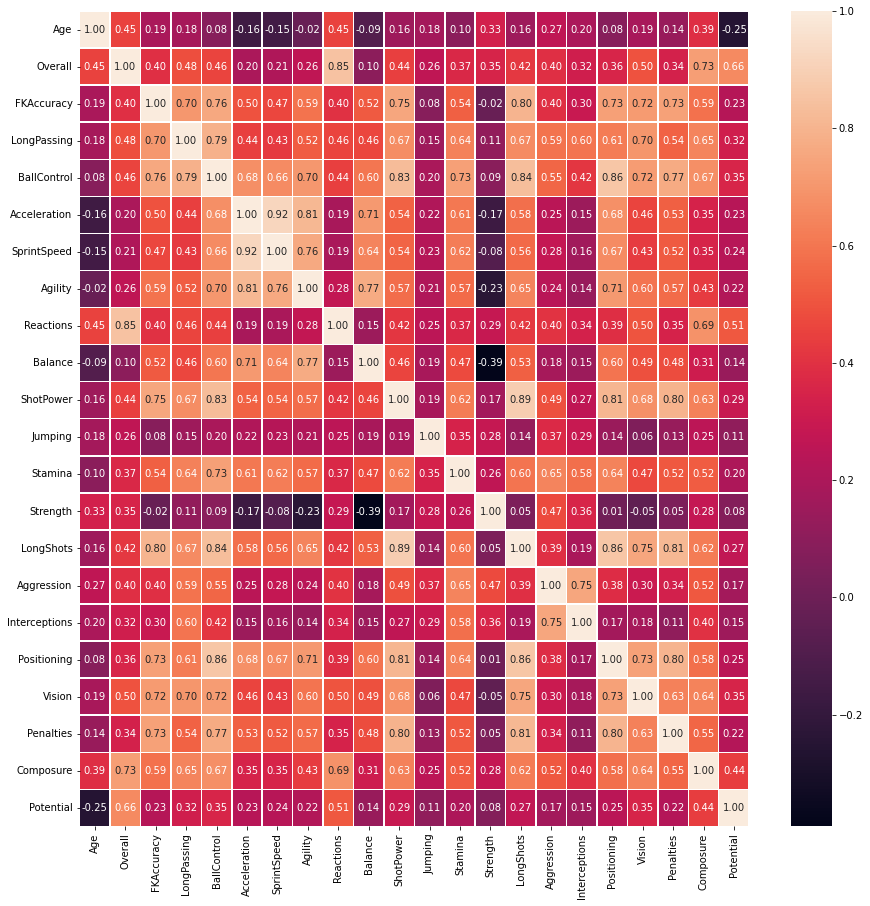

In [ ]:
# Verificar la relación entre las caracteristicas
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_lineal_reg.corr(), annot=True, fmt=".2f", linewidths=0.5, ax=ax)
plt.show()

In [ ]:
df_lineal_reg.isnull().values.any()

True

In [ ]:
df_lineal_reg.isnull().sum()

Age               0
Overall           0
FKAccuracy       48
LongPassing      48
BallControl      48
Acceleration     48
SprintSpeed      48
Agility          48
Reactions        48
Balance          48
ShotPower        48
Jumping          48
Stamina          48
Strength         48
LongShots        48
Aggression       48
Interceptions    48
Positioning      48
Vision           48
Penalties        48
Composure        48
Potential         0
dtype: int64

In [ ]:
df_lineal_reg.columns

Index(['Age', 'Overall', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Potential'],
      dtype='object')

In [ ]:
# imputacion de datos
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=10)
neighbors = knn.fit_transform(df_lineal_reg)
df_impute = pd.DataFrame(neighbors, columns=['Age', 'Overall', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Potential'])

In [ ]:
df_impute.isnull().sum()

Age              0
Overall          0
FKAccuracy       0
LongPassing      0
BallControl      0
Acceleration     0
SprintSpeed      0
Agility          0
Reactions        0
Balance          0
ShotPower        0
Jumping          0
Stamina          0
Strength         0
LongShots        0
Aggression       0
Interceptions    0
Positioning      0
Vision           0
Penalties        0
Composure        0
Potential        0
dtype: int64

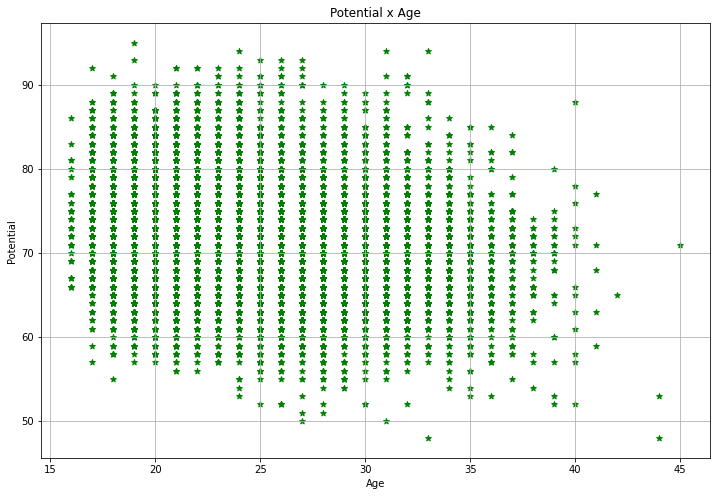

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Potential x Age")
plt.ylabel("Potential")
plt.xlabel("Age")
plt.scatter(df_impute["Age"], df_impute["Potential"],color="green", marker="*")
plt.grid()
plt.show()

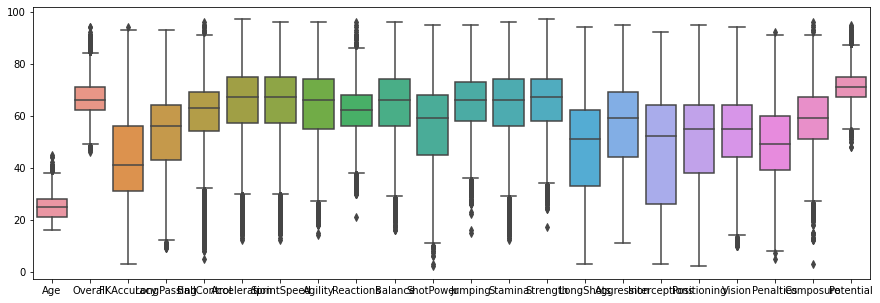

In [ ]:
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df_impute);

In [ ]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_impute.columns

Index(['Age', 'Overall', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Potential'],
      dtype='object')

In [ ]:
# TRATAMIENTO DE OUTLIERS
from feature_engine.outliers import Winsorizer
# The values to cap variables are determined using: a Gaussian approximation. the inter-quantile range proximity rule (IQR)
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', # aplicar para ambos lados de la caja y bigotes
                          fold=1.5,
                          variables=['Age', 'Overall', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure']) # variables sobre las cuales realizar el tratamiento de outliers
# entrenar modelo 
windsoriser.fit(df_impute)
# transformar en base a los datos entrenados
df_clear = windsoriser.transform(df_impute)

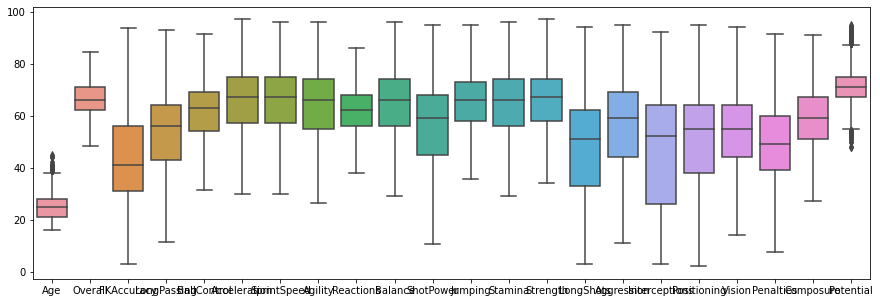

In [ ]:
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df_clear);

MODELADO

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# =========== SEPARACION DE DATOS =========== 
datos = df_clear # 
# separamos los datos en entrenamiento y prueba (este sirve para probar los algoritmos)
X_train, X_test, y_train, y_test = train_test_split(datos[['Age', 'Overall', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure']], datos["Potential"], test_size = 0.2)

# =========== APLICANDO NORMALIZACION A LOS DATOS DE X ==================
scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
# =========== TRANSFORMANDO =========== 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:,0]

array([-0.57142857,  0.57142857,  1.14285714, ...,  0.85714286,
        0.        , -0.42857143])

modelos de regresion

In [ ]:
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [ ]:
# https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

corr_test = pearsonr(x = df_clear['Overall'], y =  df_clear['Potential'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


X = df_clear['Overall']
y = df_clear['Potential']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")
print("Score: ",r2_score(predicciones,y_test))
print(mean_squared_error( predicciones, y_test) )


Coeficiente de correlación de Pearson:  0.6587699464135
P-value:  0.0

El error (rmse) de test es: 4.621755981146738
Score:  -0.3030140578514189
21.360628349265653


In [ ]:
#Primero definiremos nuestros datos de entrenamiento y de prueba.
model = []
score = []

In [ ]:
#Regresión lineal Multiple
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model_predict = linear_model.predict(X_test)
print("Score: ",r2_score(linear_model_predict,y_test))
model.append("Multi Linear Regression")
score.append(r2_score(linear_model_predict,y_test))

Score:  0.8040501542033235


In [ ]:
#Arbol de desiciones
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
tree_reg_predict = tree_reg.predict(X_test)
print("Score: ",r2_score(tree_reg_predict,y_test))
model.append("Decision Tree Regression")
score.append(r2_score(tree_reg_predict,y_test))

Score:  0.8606299744627274


In [ ]:
# Lasso
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
lasso_model_predict = lasso_model.predict(X_test)
print("Score: ",r2_score(lasso_model_predict,y_test))
model.append("Lasso Regression")
score.append(r2_score(lasso_model_predict,y_test))


Score:  -0.45876352846659807


In [ ]:
#Red elastica.
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train,y_train)
elasticnet_model_predict = elasticnet_model.predict(X_test)
print("Score: ",r2_score(elasticnet_model_predict,y_test))
model.append("Elastic Net Regression")
score.append(r2_score(elasticnet_model_predict,y_test))

Score:  -2.740447179275697


In [ ]:
#Random Forest
reg = RandomForestRegressor(n_estimators=100, random_state = 42)
reg.fit(X_train,y_train)
reg_predict = reg.predict(X_test)
print("Score: ",r2_score(reg_predict,y_test))
model.append("Random Forest Regression")
score.append(r2_score(reg_predict,y_test))

Score:  0.9191951477001522


In [ ]:
#Ada boost
reg_ada = AdaBoostRegressor(random_state=0, n_estimators=5)
reg_ada.fit(X_train,y_train)
reg_ada_predict = reg_ada.predict(X_test)
print("Score: ",r2_score(reg_ada_predict,y_test))
model.append("Ada Boost Regression")
score.append(r2_score(reg_ada_predict,y_test))

Score:  0.6845235766753637


In [ ]:
#Gradient boost
reg_gb = GradientBoostingRegressor(n_estimators = 51)
reg_gb.fit(X_train,y_train)
reg_gb_predict = reg_gb.predict(X_test)
print("Score: ",r2_score(reg_gb_predict,y_test))
model.append("Gradient Boosting Regression")
score.append(r2_score(reg_gb_predict,y_test))

Score:  0.9111733543991725


In [ ]:
#model import XGB
from xgboost import XGBRegressor
#XGB
model_params = {}
reg_xgb = XGBRegressor(**model_params)
reg_xgb.fit(X_train,y_train)
reg_xgb_predict = reg_xgb.predict(X_test)
print("Score: ",r2_score(reg_xgb_predict,y_test))
model.append("XGBoost Regression")
score.append(r2_score(reg_xgb_predict,y_test))

[22:16:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score:  0.9228719036544515


GRAFICANDO R2_SCORE

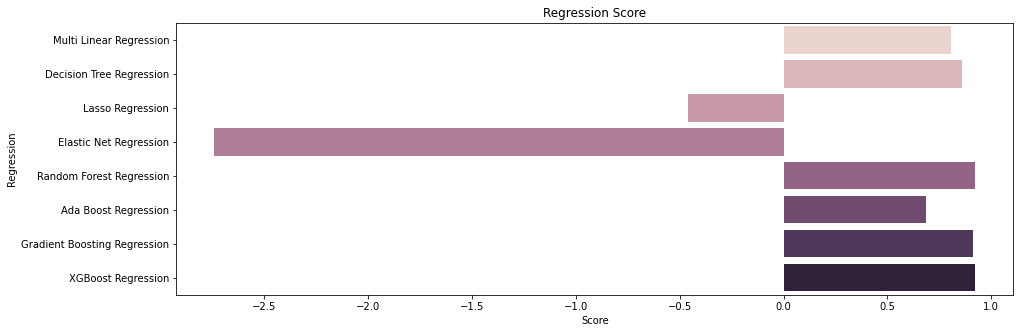

In [ ]:
plt.subplots(figsize=(15, 5))
sns.barplot(x=score,y=model,palette = sns.cubehelix_palette(len(score)))
plt.xlabel("Score")
plt.ylabel("Regression")
plt.title('Regression Score')
plt.show()